# **Import Necessary Libraries**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler


# **Load the Dataset**

In [ ]:
# Load the CSV file into a DataFrame
heart_disease_df = pd.read_csv('/content/inpro2.csv')

# Display the first few rows of the dataset
print(heart_disease_df.head())


   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   52    1   0       125   212    0        1      168      0      1.0      2   
1   53    1   0       140   203    1        0      155      1      3.1      0   
2   70    1   0       145   174    0        1      125      1      2.6      0   
3   61    1   0       148   203    0        1      161      0      0.0      2   
4   62    0   0       138   294    1        1      106      0      1.9      1   

   ca  thal  target  
0   2     3       0  
1   0     3       0  
2   0     3       0  
3   1     3       0  
4   3     2       0  


# **Data Cleaning and Transformation**

In [ ]:
# Load the CSV file into a DataFrame
heart_disease_df = pd.read_csv('/content/inpro2.csv')

# Display the first few rows of the dataset to check column names
print(heart_disease_df.head())

# Check for missing values
print(heart_disease_df.isnull().sum())

# Convert categorical variables (like 'sex', 'thal') into numerical format if they are not already
heart_disease_df['sex'] = heart_disease_df['sex'].map({0: 'Female', 1: 'Male'})

# If needed, normalize numerical data, making sure column names match EXACTLY
# Replace with the actual names from your dataframe
scaler = StandardScaler()
heart_disease_df[['age', 'trestbps', 'chol', 'thalach']] = scaler.fit_transform(
    heart_disease_df[['age', 'trestbps', 'chol', 'thalach']]
)

   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   52    1   0       125   212    0        1      168      0      1.0      2   
1   53    1   0       140   203    1        0      155      1      3.1      0   
2   70    1   0       145   174    0        1      125      1      2.6      0   
3   61    1   0       148   203    0        1      161      0      0.0      2   
4   62    0   0       138   294    1        1      106      0      1.9      1   

   ca  thal  target  
0   2     3       0  
1   0     3       0  
2   0     3       0  
3   1     3       0  
4   3     2       0  
age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64


# **Exploratory Data Analysis (EDA)**

**a. Heart Disease Rate**

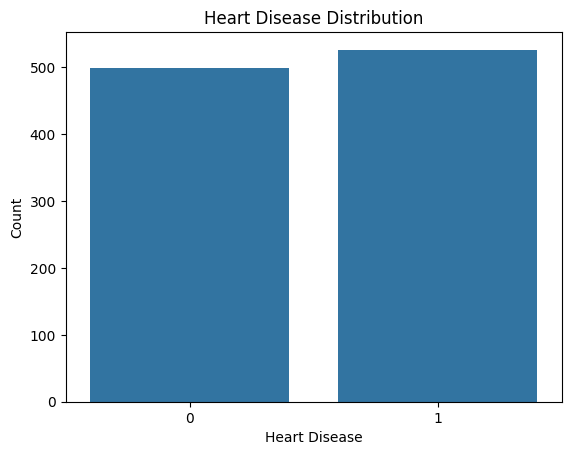

In [ ]:
# Plot the distribution of heart disease in the dataset
sns.countplot(x='target', data=heart_disease_df)
plt.title('Heart Disease Distribution')
plt.xlabel('Heart Disease')
plt.ylabel('Count')
plt.show()


**b. Heart Disease by Gender**

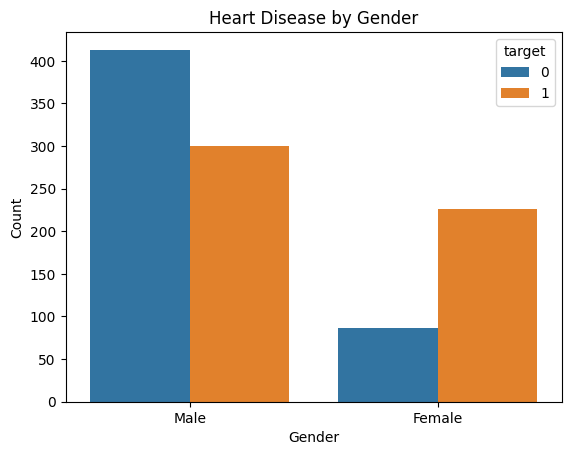

In [ ]:
# Plot heart disease rates by gender
sns.countplot(x='sex', hue='target', data=heart_disease_df)
plt.title('Heart Disease by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()


**c. Heart Disease by Age Group**

<ipython-input-6-f4b9b3e93bc4>:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_group_counts = heart_disease_df.groupby(['age_group', 'target'])['age'].count().unstack()


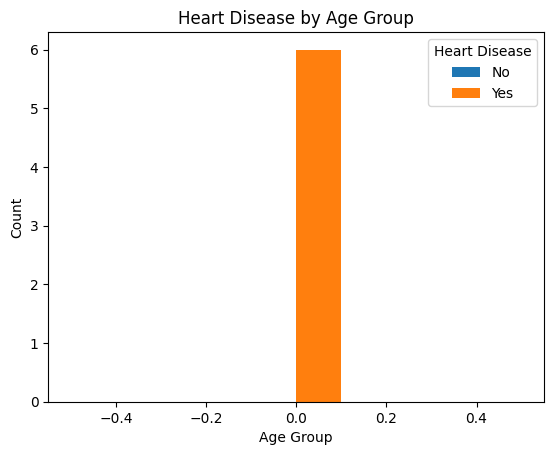

In [ ]:
# Create age groups
heart_disease_df['age_group'] = pd.cut(heart_disease_df['age'], bins=[20, 30, 40, 50, 60, 70, 80], labels=['20-30', '30-40', '40-50', '50-60', '60-70', '70-80'])

# Group data by age group and target, then count occurrences
age_group_counts = heart_disease_df.groupby(['age_group', 'target'])['age'].count().unstack()

# Plot heart disease rates by age group using a bar plot
age_group_counts.plot(kind='hist')
plt.title('Heart Disease by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.legend(title='Heart Disease', labels=['No', 'Yes']) # Add a legend for clarity
plt.show()

**d. Correlation Analysis**

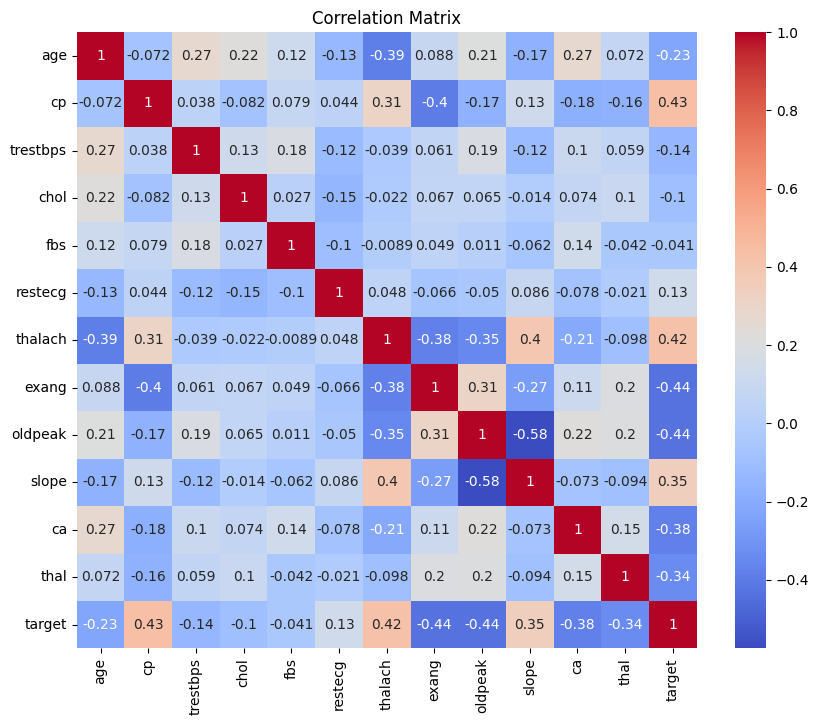

In [ ]:
# Drop non-numerical columns before calculating correlations
corr_matrix = heart_disease_df.select_dtypes(include=['number']).corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


# **Dashboard Creation**

In [ ]:
pip install dash pandas plotly


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.5/7.5 MB 71.2 MB/s eta 0:00:00


In [ ]:
import dash
import dash_core_components as dcc
import dash_html_components as html
from dash.dependencies import Input, Output
import pandas as pd
import plotly.express as px

# Load the dataset
heart_disease_df = pd.read_csv('/content/inpro2.csv')

# Convert categorical variables
heart_disease_df['sex'] = heart_disease_df['sex'].map({0: 'Female', 1: 'Male'})
heart_disease_df['target'] = heart_disease_df['target'].map({0: 'No Disease', 1: 'Disease'})

# Create the Dash app
app = dash.Dash(__name__)

# Layout of the dashboard
app.layout = html.Div([
    html.H1("Heart Disease Diagnostic Dashboard"),

    # Dropdown for selecting visualization
    html.Div([
        html.Label("Select a Feature:"),
        dcc.Dropdown(
            id='feature-dropdown',
            options=[
                {'label': 'Age', 'value': 'age'},
                {'label': 'Resting Blood Pressure', 'value': 'resting blood pressure'},
                {'label': 'Serum Cholesterol', 'value': 'serum cholesterol'},
                {'label': 'Maximum Heart Rate', 'value': 'maximum heart rate achieved'},
            ],
            value='age'
        ),
    ]),

    # Visualization based on feature selection
    dcc.Graph(id='feature-graph'),

    # Visualization for Heart Disease by Gender
    dcc.Graph(
        id='gender-graph',
        figure=px.histogram(heart_disease_df, x='sex', color='target', barmode='group',
                            title='Heart Disease by Gender')
    ),

    # Visualization for Heart Disease by Age Group
    dcc.Graph(
        id='age-group-graph',
        figure=px.histogram(heart_disease_df, x='age', color='target', nbins=20, title='Heart Disease by Age Group')
    ),
])

# Callback to update the feature graph based on dropdown selection
@app.callback(
    Output('feature-graph', 'figure'),
    [Input('feature-dropdown', 'value')]
)
def update_graph(selected_feature):
    fig = px.histogram(heart_disease_df, x=selected_feature, color='target', nbins=50,
                       title=f'Heart Disease by {selected_feature.capitalize()}')
    return fig

# Run the app
if __name__ == '__main__':
    app.run_server(debug=True)


<ipython-input-9-08cddae8d932>:2: UserWarning: 
The dash_core_components package is deprecated. Please replace
`import dash_core_components as dcc` with `from dash import dcc`
  import dash_core_components as dcc
<ipython-input-9-08cddae8d932>:3: UserWarning: 
The dash_html_components package is deprecated. Please replace
`import dash_html_components as html` with `from dash import html`
  import dash_html_components as html


<IPython.core.display.Javascript object>